# Example_7_3

Let's consider the ridge regression problem from {\tt{Example 6.1}}: 
$$
\frac{1}{n}\left\Vert {\bf{X}}{\bf{w}}-{\bf{y}}\right\Vert _{2}^{2}+\frac{\lambda}{2}\left\Vert {\bf{w}}\right\Vert _{2}^{2}
$$

To solve it using ADMM, we define $g({\bf{w}}) = \frac{1}{n}\left\Vert {\bf{X}}{\bf{w}}-{\bf{y}}\right\Vert _{2}^{2}$ and $g({\bf{z}}) = \frac{\lambda}{2}\left\Vert {\bf{z}}\right\Vert _{2}^{2}$

Using the augmented Lagrangian formulation:
$$
L_{\rho}\left({\bf{w}},{\bf{z}},{\bf{\beta}}\right)=g\left({\bf{w}}\right)+h\left({\bf{z}}\right)+{\bf{\beta}}^{T}\left({\bf{w}}-{\bf{z}}\right)+\frac{\rho}{2}\left\Vert {\bf{w}}-{\bf{z}}\right\Vert _{2}^{2}
$$

It is easy to find the updating formulas:
$$
    {\bf{w}}_{k+1} = \left( 2 {\bf{X}}^T{\bf{X}} - n\rho {\bf{I}}\right)^{-1} \left( 2 {\bf{X}}^T {\bf{b}} + n\rho {\bf{z}}_k - n{\bf{\beta}}_k\right)\\
    {\bf{z}}_{k+1} = ({\bf{\beta}}_k + \rho {\bf{w}}_k)/(\lambda + \rho)\\
    {\bf{\beta}}_{k+1} = {\bf{\beta}}_{k} + \rho ({\bf{w}}_{k+1} - {\bf{z}}_{k+1})
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nf=2           # Number of features
ns=4           # Number of samples
lamb=0.1       # Regularizer
ro=0.2         # Quadratic term
niter=20       # Number of iterations
X=np.random.randn(ns,nf) # Samples
y=np.random.randn(ns,1)   # Samples
# Direct implementation
w_opt=np.linalg.inv(X.T@X+2*lamb*np.eye(nf))@(X.T@y)

# ADMM implementation
w=np.zeros((nf,niter))
beta=np.zeros((nf,niter))
z=np.zeros((nf,niter))
for k in range(1,niter):
    w[:,k]=np.linalg.inv(X.T@X+2*ro*np.eye(nf))@((X.T@y).flatten()+2*ro*z[:,k-1]-2*beta[:,k-1]);
    z[:,k]=(beta[:,k-1]+ro*w[:,k])/(lamb+ro)
    beta[:,k]=beta[:,k-1]+ro*(w[:,k]-z[:,k])

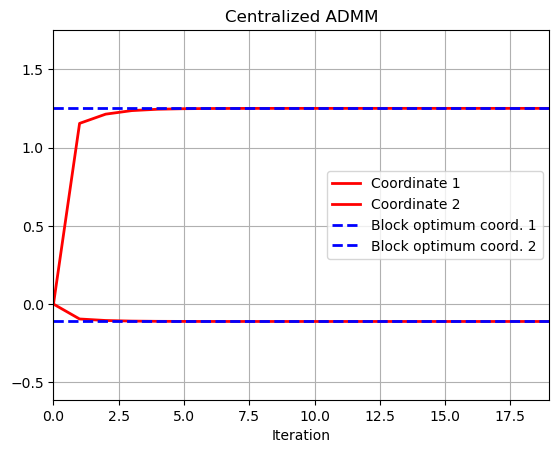

In [6]:
t = range(niter)
plt.plot(t,w[0,:],color='r', linewidth = 2)
plt.plot(t,w[1,:],color='r', linewidth = 2)
plt.plot(t,np.ones(niter)*w_opt[0],color = 'b', linestyle = 'dashed',linewidth = 2)
plt.plot(t,np.ones(niter)*w_opt[1],color = 'b', linestyle = 'dashed',linewidth = 2)
plt.grid()
plt.xlim([0, niter-1])
plt.ylim([np.min(w_opt)-.5, np.max(w_opt)+.5])
plt.title('Centralized ADMM')
plt.xlabel('Iteration')
plt.legend(['Coordinate 1','Coordinate 2','Block optimum coord. 1','Block optimum coord. 2'])
plt.show()